In [0]:
import pandas as pd
import numpy as np

In [24]:
quotes = pd.read_csv('quote_data.csv')
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [25]:
quotes = quotes.drop_duplicates(subset='quote', keep='last')
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [26]:
quotes.shape

(108, 2)

In [0]:
quotes.to_csv('quotes.csv',index=None)

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

all_compounds = []
for sentence in quotes['quote']:
  print(sentence)
  sentimentscore = analyzer.polarity_scores(sentence)
  for k in sorted(sentimentscore):
    print('{}: {}'.format(k, sentimentscore[k]), end='')
    print()

    if k == 'compound':
      all_compounds.append(sentimentscore[k])

Pain is inevitable, but misery is optional.
compound: -0.802
neg: 0.59
neu: 0.41
pos: 0.0
To avoid criticism, do nothing, say nothing, be nothing.
compound: -0.6249
neg: 0.421
neu: 0.579
pos: 0.0
Believe and act as if it were impossible to fail.
compound: -0.5423
neg: 0.28
neu: 0.72
pos: 0.0
Never get out of the boat. Absolutely goddamn right. Unless you were goin' all the way.
compound: -0.5256
neg: 0.184
neu: 0.816
pos: 0.0
Nobody can make you feel inferior without your consent.
compound: -0.5213
neg: 0.384
neu: 0.616
pos: 0.0
What we fear doing most is usually what we most need to do.
compound: -0.4939
neg: 0.211
neu: 0.789
pos: 0.0
Everything you’ve ever wanted is on the other side of fear.
compound: -0.4939
neg: 0.242
neu: 0.758
pos: 0.0
Success is going from failure to failure without losing your enthusiasm.
compound: -0.4805
neg: 0.431
neu: 0.287
pos: 0.282
If there is no struggle, there is no progress.
compound: -0.4404
neg: 0.462
neu: 0.345
pos: 0.193
There are no short cuts t

In [0]:
#Compound score -1 for most negative and +1 for most positive
# positive sentiment: compound score >= 0.05
# neutral sentiment: compound score > -0.05 and compound score < 0.05


In [30]:
all_compounds[:10]

[-0.802,
 -0.6249,
 -0.5423,
 -0.5256,
 -0.5213,
 -0.4939,
 -0.4939,
 -0.4805,
 -0.4404,
 -0.3612]

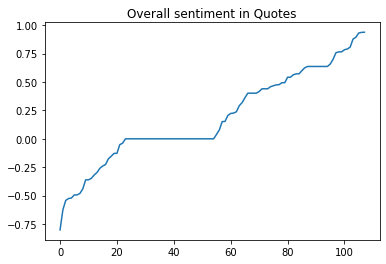

In [31]:
import matplotlib.pyplot as plt
plt.plot(sorted(all_compounds))
plt.title('Overall sentiment in Quotes')
plt.show()

In [32]:
quotes['sentimentscore'] = all_compounds
quotes.head()

,quote,author,sentimentscore
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213


In [33]:
minss = np.min(quotes['sentimentscore'])
maxss = np.max(quotes['sentimentscore'])
minss, maxss

(-0.802, 0.9382)

In [34]:
quotes[quotes['sentimentscore'] == np.min(quotes['sentimentscore'])]

,quote,author,sentimentscore
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.802


In [35]:
quotes[quotes['sentimentscore'] == np.max (quotes['sentimentscore'])]

,quote,author,sentimentscore
107,"When we are mindful, deeply in touch with the ...",Thich Nhat Hanh,0.9382


In [36]:
import numpy as np
from random import randrange
from nltk.sentiment.vader import SentimentIntensityAnalyzer

quotes = []

def prepare_sentiment_quotes(quotes_path):
  global quotes

  quotes = pd.read_csv(quotes_path)

  analyzer = SentimentIntensityAnalyzer()

  all_compounds = []
  for sentence in quotes['quote']:
    sentscore = analyzer.polarity_scores(sentence)
    for k in sorted(sentscore):
      if  k == 'compound':
        all_compounds.append(sentscore[k])
        
  quotes['sentiment_score'] = all_compounds

  quotes = quotes.sort_values('sentiment_score')
  quotes['index'] = [ix for ix in range(0, len(quotes))]

  return quotes

prepare_sentiment_quotes('quotes.csv')


,quote,author,sentiment_score,index
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020,0
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249,1
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423,2
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256,3
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213,4
...,...,...,...,...
103,"Don’t wish it were easier, wish you were better.",Jim Rohn,0.8779,103
104,"Out yonder there was this huge world, which ex...",Albert Einstein,0.8939,104
105,"Life is beautiful, so long as it is consuming ...",D.H. Lawrence,0.9313,105
106,I offer you peace. I offer you love. I offer y...,Mahatma Gandhi,0.9371,106


In [37]:
quotes.head()

,quote,author,sentiment_score,index
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020,0
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249,1
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423,2
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256,3
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213,4


In [39]:
max_ind = np.max(quotes['index'].values)

def starting_quote(direction = None, current_ind=None):
  rand_ind = randrange(max_ind)
  darker = None
  brighter = None

  if current_ind is None:
    brighter = rand_ind

  if direction == 'brighter':
    brighter = current_ind
  else:
    darker = current_ind
  
  if darker is not None:
    current_ind = rand_ind

    try:
      current_ind = int(darker)
    except ValueError:
      current_ind = rand_ind
    
    if current_ind > 0:
      rand_ind = randrange(0, current_ind)
      print('darker')
    else:
      rand_ind =rand_ind
    
  elif brighter is not None:
    # currect_ind = rand_ind
    try:
     current_ind = int(brighter)
    except ValueError:
     current_ind = rand_ind
   
    if current_ind < max_ind-1:
     rand_ind = randrange(current_ind, max_ind)
     print('brighter')
    else:
     rand_ind =rand_ind
  
  else:
      rand_ind = rand_ind
  return rand_ind

starting_quote('darker', 20)

darker


14

In [47]:
quotes[quotes['index'] == starting_quote('darker',8)]

darker


,quote,author,sentiment_score,index
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256,3


Now we have every thing we need, lets put this into flask.

